# 6.4 Machine Learning - Regression

## This script contains the following:¶
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## 1. Importing Libraries and Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\samir\OneDrive\Documents\CareerFoundry - Data Analytics\Data Immersion\Acheivement 6 - Advanced Analytics & Dashboard Design'

In [5]:
df = pd.read_csv(os.path.join(path, 'Data', 'timesdata_clean.csv'), index_col = False, encoding='latin-1')

## 2. Data Cleaning

In [6]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,percent_international,female_male_ratio,percent_female,percent_male,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,20152,8.9,0.25,0,0.00,0.00,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,2243,6.9,0.27,33 : 67,0.33,0.67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,11074,9.0,0.33,37 : 63,0.37,0.63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,15596,7.8,0.22,1.79,0.42,0.58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,7929,8.4,0.27,1.91,0.45,0.55,2011


In [7]:
df.shape

(2603, 15)

In [8]:
# checking for missing values
df.isnull().sum()

world_rank               0
university_name          0
country                  0
teaching                 0
international            9
research                 0
citations                0
income                   0
num_students             0
student_staff_ratio      0
percent_international    0
female_male_ratio        0
percent_female           0
percent_male             0
year                     0
dtype: int64

In [9]:
# checking for duplicates
dups = df.duplicated()
dups.shape

(2603,)

In [10]:
# checking for extreme values
df.describe()

,teaching,international,research,citations,income,num_students,student_staff_ratio,percent_international,percent_female,year
count,2603.000000,2594.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,37.801498,52.007440,35.910257,60.921629,44.877833,23332.632347,18.027199,0.150465,0.446934,2014.075682
std,17.604218,22.103825,21.254805,23.073219,24.396057,17832.143362,11.656084,0.107366,0.184224,1.685733
min,9.900000,7.100000,2.900000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,24.700000,33.425000,19.600000,45.500000,31.400000,12199.500000,11.650000,0.070000,0.410000,2013.000000
50%,33.900000,50.300000,30.500000,62.500000,39.500000,20584.000000,15.900000,0.130000,0.510000,2014.000000
75%,46.400000,69.000000,47.250000,79.050000,56.000000,29787.000000,21.200000,0.210000,0.560000,2016.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,0.780000,2016.000000


C:\Users\samir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_students', ylabel='Density'>

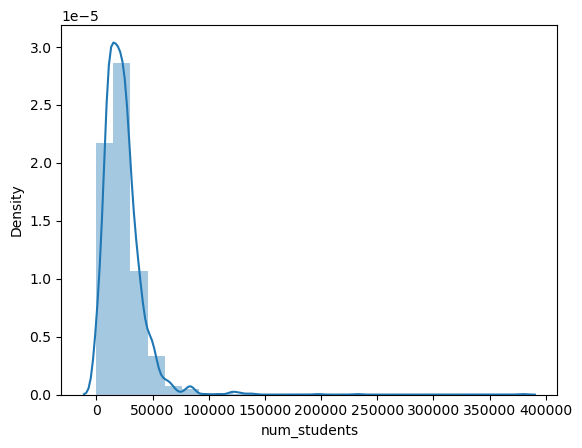

In [11]:
sns.distplot(df['num_students'], bins=25)

In [12]:
# cleaning extreme values
df2 = df[df['num_students'] <=100000]

## 3. Data prep for regression analysis

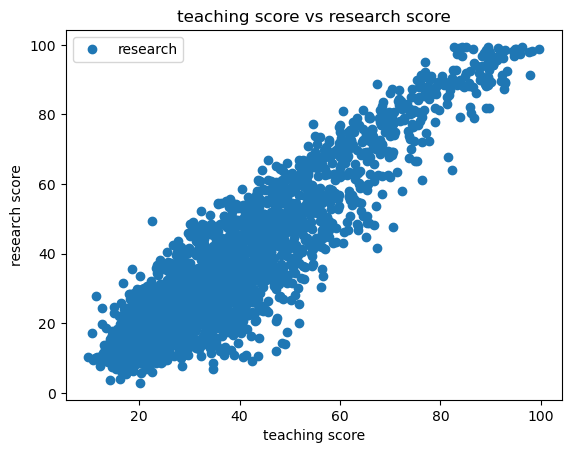

In [13]:
# exploring data visually using scatterplot
df2.plot(x = 'teaching', y='research',style='o') 
plt.title('teaching score vs research score')  
plt.xlabel('teaching score')  
plt.ylabel('research score')  
plt.show()

### Hypothesis: Schools with higher teaching scores have smaller amounts of students.

In [14]:
# reshaping variables into NumPy arrays
X = df2['teaching'].values.reshape(-1,1)
y = df2['research'].values.reshape(-1,1)

In [15]:
X

array([[99.7],
       [97.7],
       [97.8],
       ...,
       [24. ],
       [20.1],
       [16.2]])

In [16]:
y

array([[98.7],
       [98. ],
       [91.4],
       ...,
       [10.2],
       [16. ],
       [18.3]])

In [17]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [18]:
# creating a regression object
regression = LinearRegression()

In [19]:
# fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# predicting the values of y using X
y_predicted = regression.predict(X_test)

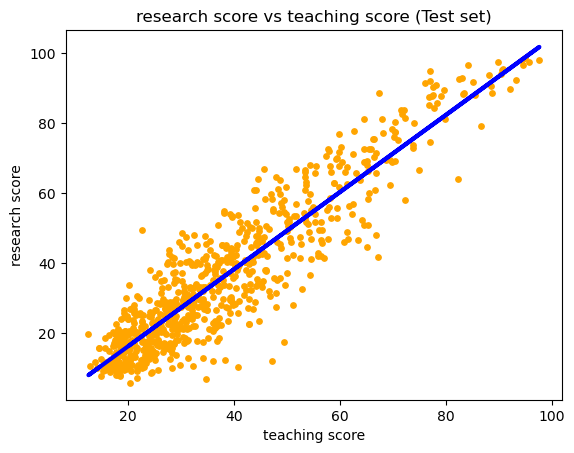

In [30]:
# plotting the regression line from the model
plot_test = plt
plot_test.scatter(X_test, y_test, color='orange', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('research score vs teaching score (Test set)')
plot_test.xlabel('teaching score')
plot_test.ylabel('research score')
plot_test.show()

### The regression line appears to fit the data very well and is following the general flow of the data.

In [22]:
# creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.10109289]]
Mean squared error:  73.19988144824714
R2 score:  0.8408323274217491


In [24]:
y_predicted

array([[ 16.72014028],
       [ 36.31959372],
       [ 22.11549544],
       [ 35.10839154],
       [ 41.38462101],
       [ 41.60483959],
       [ 34.00729865],
       [ 59.77287227],
       [ 26.07942984],
       [ 79.92287216],
       [ 17.60101459],
       [ 14.95839166],
       [ 34.77806367],
       [ 14.84828237],
       [ 73.09609624],
       [ 19.14254464],
       [ 71.77478477],
       [ 38.08134234],
       [ 37.97123305],
       [ 42.59582319],
       [ 15.17861023],
       [ 19.03243535],
       [ 29.4928178 ],
       [ 11.5450037 ],
       [ 22.66604189],
       [ 27.73106918],
       [ 71.88489406],
       [ 43.36658821],
       [ 55.80893787],
       [ 20.35374682],
       [ 14.40784521],
       [ 35.98926585],
       [ 41.05429315],
       [ 36.5398123 ],
       [ 68.36139681],
       [ 61.86494876],
       [ 25.08844624],
       [ 28.17150634],
       [ 30.59391069],
       [ 66.37942961],
       [ 30.4838014 ],
       [ 15.83926597],
       [ 11.98544085],
       [ 26

In [25]:
# comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.8,16.720140
1,54.5,36.319594
2,20.9,22.115495
3,24.3,35.108392
4,39.8,41.384621
5,34.1,41.604840
6,22.8,34.007299
7,55.7,59.772872
8,37.4,26.079430
9,84.3,79.922872


### Based on the R2 score of 0.8408040628404558, I presume that my model performed well on the test set. However, I would like to note that when looking at the dataframe that I created that has the predicted values of y and the actual values of y that there are instances of major descrepancies that makes me believe that my model did not perform well.  Nevertheless, I am aware that the dataframe excert I see is only a small piece of the actual data so I will place more emphais on the R2 score and conclude that my model performed very well.